## Auto Encoders

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [3]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

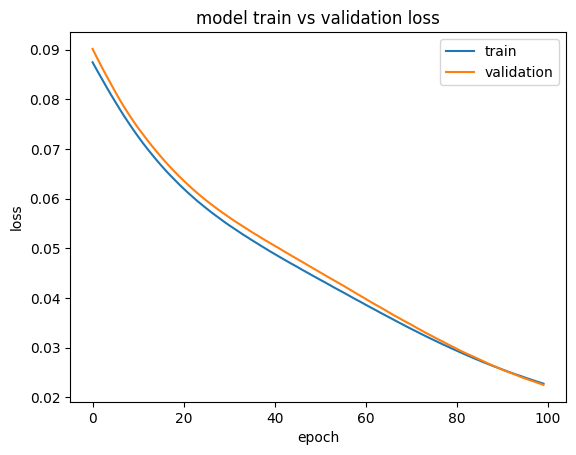

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


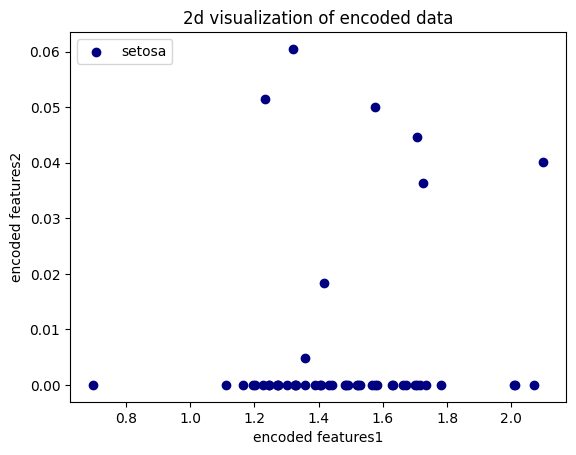

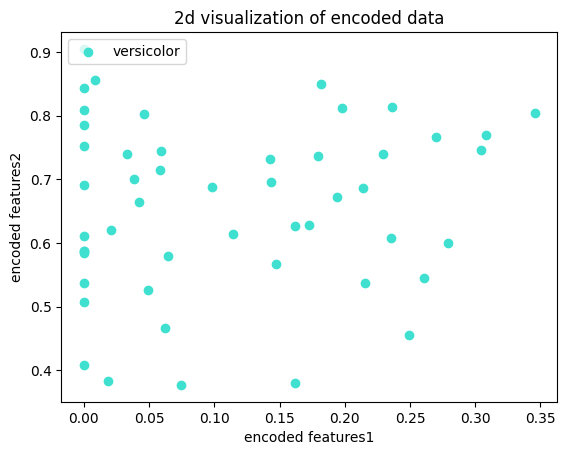

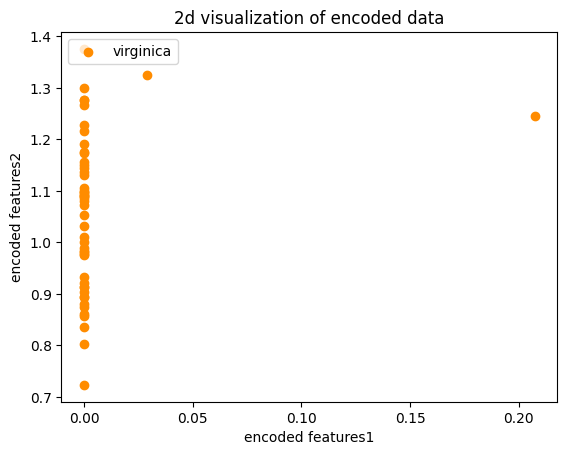

In [4]:
X_train,X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
encoding_dim = 2

input_layer = Input(shape = (input_dim,))

# "encoded" representation of the input
encoded = Dense(encoding_dim,activation='relu')(input_layer)

# "decoded" lossy reconstruction of the input
decoded = Dense(input_dim,activation='sigmoid')(encoded)

# Map an input to reconstruction
autoencoder = Model(input_layer,decoded)

encoder = Model(input_layer,encoded)

autoencoder.compile(optimizer='adam',loss='mse')

history = autoencoder.fit(
    X_train,X_train,
    epochs=100,
    batch_size = 16,
    shuffle = True,
    validation_data = (X_test,X_test),
    verbose = 0
)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoded_X = encoder.predict(X_scaled)
plot3clusters(encoded_X, "2d visualization of encoded data", "encoded features")